### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_lyon = pd.read_csv('Data/Lyon/listings.csv')
df_lyon.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,831713,https://www.airbnb.com/rooms/831713,20240913025629,2024-09-13,city scrape,645 sq ft (60m²) apartment downtown lyon 2BR...,Apartment located in Saint-Just up the hill of...,NaN,https://a0.muscache.com/pictures/12333829/0f9e...,4355017,...,4.89,4.75,4.72,6938513291736,f,1,1,0,0,0.38
1,845068,https://www.airbnb.com/rooms/845068,20240913025629,2024-09-13,previous scrape,APARTMENT INCOMPARABLE PLACE OF THE LYON,n the heart of the Lyonnaise peninsula in the ...,Everything is very exciting in this lively dis...,https://a0.muscache.com/pictures/miso/Hosting-...,3548058,...,4.63,4.88,4.63,6938212387343,f,1,1,0,0,0.06
2,877193,https://www.airbnb.com/rooms/877193,20240913025629,2024-09-13,previous scrape,Loft heart of Lyon ideal for family,NaN,"The area is lively, many shops: bakeries, butc...",https://a0.muscache.com/pictures/7c52fdbb-3959...,4634428,...,4.94,4.85,4.77,6938312653768,f,1,1,0,0,1.30
3,903331,https://www.airbnb.com/rooms/903331,20240913025629,2024-09-13,city scrape,GD STAND - BUSINESS OR HOLIDAYS- 4*,"Rated 4 stars- for business or for holidays, i...",The district of Brotteaux is very renowned for...,https://a0.muscache.com/pictures/hosting/Hosti...,4829230,...,4.79,4.62,4.47,6938613145318,f,2,2,0,0,0.27
4,903333,https://www.airbnb.com/rooms/903333,20240913025629,2024-09-13,city scrape,LYON BROTTEAUX- MEUBLE LONGUE DUREE,Very bright apartment and ideally located in t...,The district of Brotteaux is very renowned for...,https://a0.muscache.com/pictures/hosting/Hosti...,4829230,...,4.80,4.60,4.80,"Available with a mobility lease only (""bail mo...",f,2,2,0,0,0.08


In [3]:
df_lyon.shape

(9738, 75)

In [4]:
df_lyon.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.738000e+03,9.738000e+03,9.738000e+03,9736.000000,9736.000000,0.0,9738.000000,9738.000000,9738.000000,5302.000000,...,7921.000000,7918.000000,7919.000000,7917.000000,7917.000000,9738.000000,9738.000000,9738.000000,9738.000000,7921.000000
mean,3.556831e+17,2.024091e+13,1.440158e+08,25.592030,33.721343,NaN,45.759167,4.840398,3.214212,1.129479,...,4.670694,4.832921,4.850207,4.770432,4.626933,6.967755,6.557301,0.394331,0.009961,1.321380
std,4.674744e+17,0.000000e+00,1.621178e+08,224.204086,239.145549,NaN,0.013161,0.019953,1.745169,0.437439,...,0.427583,0.300101,0.286090,0.305689,0.395600,18.342585,18.415203,1.340077,0.143331,1.761011
min,5.676600e+04,2.024091e+13,4.382300e+04,1.000000,1.000000,NaN,45.721930,4.773840,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.049519e+07,2.024091e+13,2.408021e+07,1.000000,1.000000,NaN,45.750896,4.828691,2.000000,1.000000,...,4.500000,4.790000,4.810000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.140000
50%,4.319547e+07,2.024091e+13,6.642570e+07,1.000000,2.000000,NaN,45.759240,4.836859,2.000000,1.000000,...,4.800000,4.920000,4.940000,4.850000,4.710000,1.000000,1.000000,0.000000,0.000000,0.590000
75%,8.375752e+17,2.024091e+13,2.207459e+08,2.000000,4.000000,NaN,45.769080,4.852667,4.000000,1.000000,...,4.990000,5.000000,5.000000,5.000000,4.880000,2.000000,1.000000,0.000000,0.000000,1.850000
max,1.243549e+18,2.024091e+13,6.511367e+08,3474.000000,3506.000000,NaN,45.807220,4.897530,16.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,100.000000,19.000000,5.000000,20.560000


In [5]:
df_lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9738 entries, 0 to 9737
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9738 non-null   int64  
 1   listing_url                                   9738 non-null   object 
 2   scrape_id                                     9738 non-null   int64  
 3   last_scraped                                  9738 non-null   object 
 4   source                                        9738 non-null   object 
 5   name                                          9738 non-null   object 
 6   description                                   9439 non-null   object 
 7   neighborhood_overview                         5246 non-null   object 
 8   picture_url                                   9738 non-null   object 
 9   host_id                                       9738 non-null   i

### Cleaning

In [6]:
df_lyon = df_lyon.T.drop_duplicates().T
df_lyon.dropna(axis=1, how='all', inplace=True)
df_lyon.drop([c for c in df_lyon.columns if df_lyon[c].nunique()==1], axis=1, inplace=True)
df_lyon.drop(df_lyon.columns[df_lyon.columns.str.contains("url")], axis=1, inplace=True)

In [7]:
df_lyon.price = df_lyon.price.str.replace(r"$", "").str.replace(",", "").astype("float32")

In [8]:
numerical_columns = df_lyon.select_dtypes(exclude=object).columns.tolist()
categorical_columns = df_lyon.select_dtypes(include=object).columns.tolist()

In [9]:
numeric_imputer = SimpleImputer(strategy='median')
df_lyon[numerical_columns] = numeric_imputer.fit_transform(df_lyon[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df_lyon[categorical_columns] = categorical_imputer.fit_transform(df_lyon[categorical_columns])

### EDA

In [10]:
df_lyon['price'].describe()

count    9738.000000
mean       96.619019
std        88.033600
min        14.000000
25%        78.000000
50%        80.000000
75%        85.000000
max      2214.000000
Name: price, dtype: float64

In [11]:
df_lyon['bedrooms'].mean()

np.float64(1.3197781885397413)

In [12]:
df_lyon['bathrooms'].mean()

np.float64(1.070497021975765)

In [13]:
df_lyon['review_scores_rating'].mean()

np.float64(4.781034093242946)

In [14]:
average_annual_availability = df_lyon['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate


np.float64(71.42354341275669)

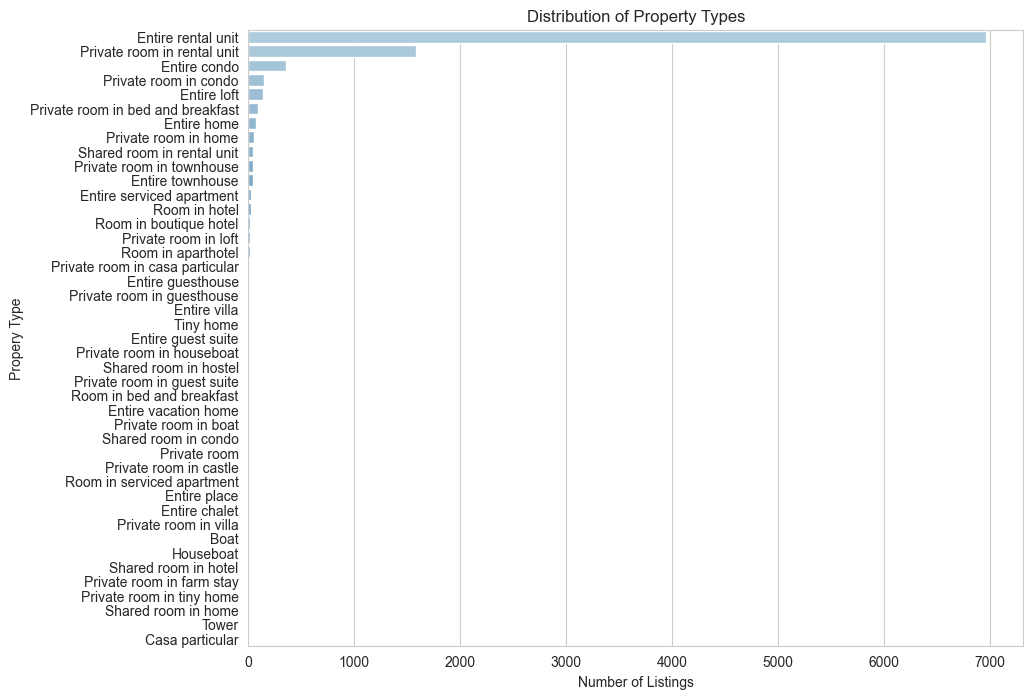

In [15]:
sns.set_style("whitegrid")

property_type_counts = df_lyon['property_type'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="Blues_d")
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.show()

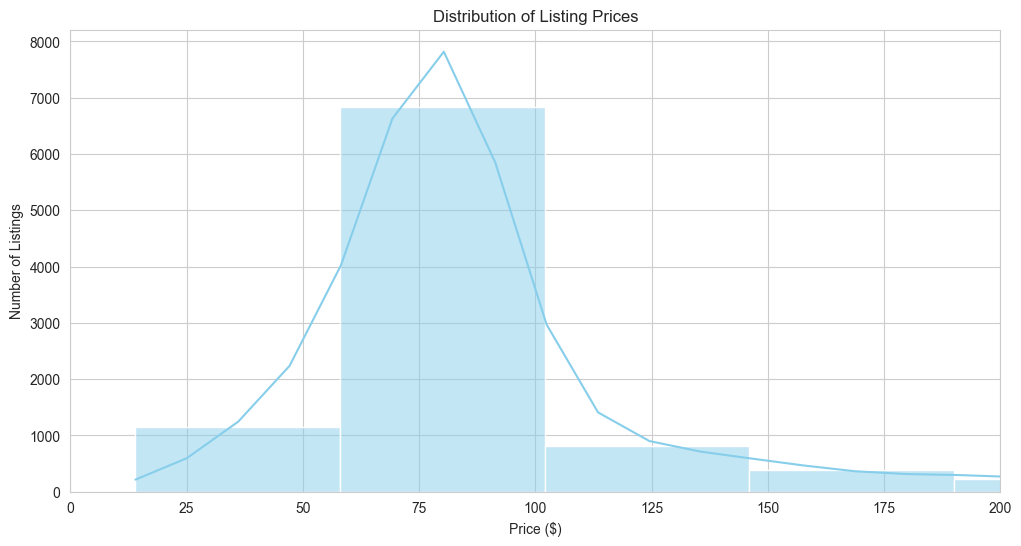

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df_lyon['price'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, df_lyon['price'].quantile(0.95))
plt.show()

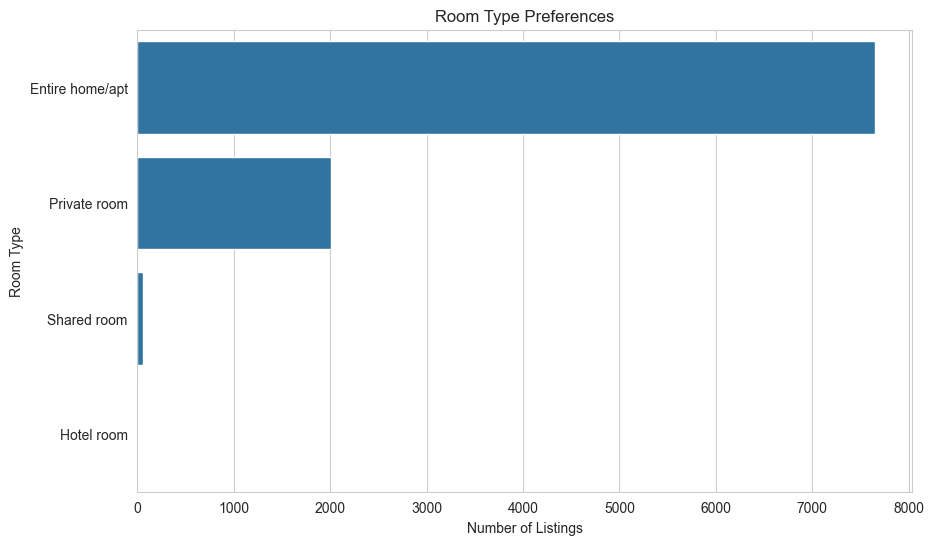

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_lyon, y='room_type', order=df_lyon['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

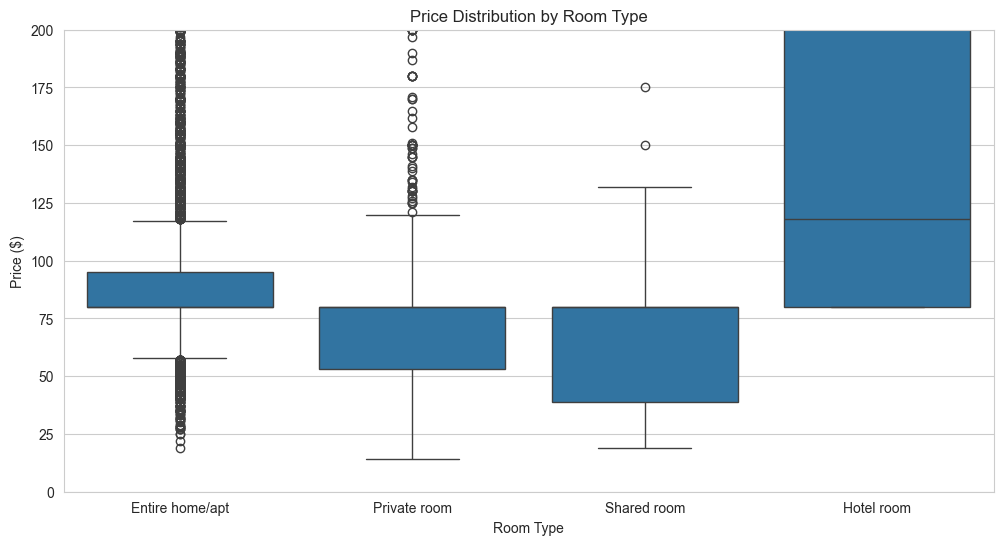

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df_lyon)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, df_lyon['price'].quantile(0.95))
plt.show()

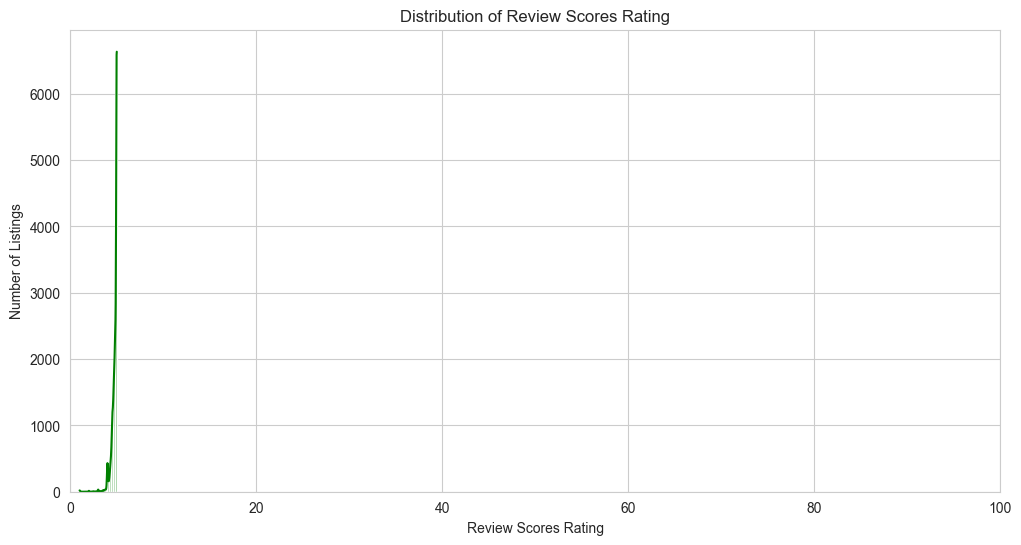

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df_lyon['review_scores_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)
plt.show()

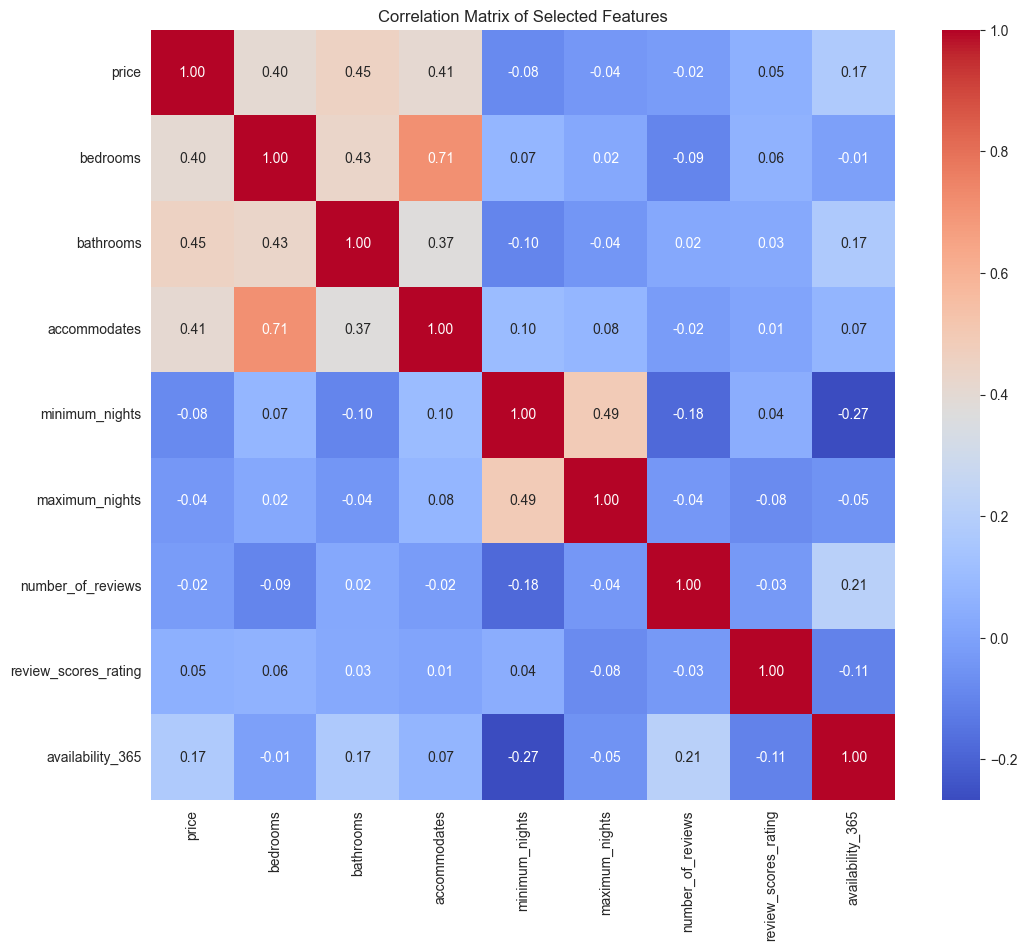

In [20]:
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]

for col in numerical_columns:
    df_lyon[col] = pd.to_numeric(df_lyon[col], errors='coerce')

corr_matrix = df_lyon[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()